In [2]:
# Ref : https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
import matplotlib
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

def value_iteration2(S, A, R,G,w,thresh):
    V = np.zeros(100)
    V.fill(-99.99)
    nav = np.chararray((10,10),unicode=True)
    nav[:] = u'\u2190'
    delta = float('inf')
    while delta > thresh:
        delta = 0
        for i in range(0,10):
            for j in range(0,10):
                #convert state to numeric integer
                state = S[j][i].astype(int)
                v = V[state]
                
                #for each state , iterate through all 4 actions 'K'   
                for k in range(0,4):
                    
                    p = 0
                    sum = 0
                    c_case = 0
                    edge_case = False
                    
                    #iterate through all directions for a given actions
                    for t in range (0,4):
                        #new X, y for the desired action cell
                        s_x = j + A[t][0]
                        s_y = i + A[t][1]
                        if(s_x < 0 or s_x > 9 or s_y < 0 or s_y > 9) :
                            
                            #Edge / Corner Case:
                            if t == k:
                                #I want to drift off the grid
                                c_case = c_case + 1 - w + w/4
                            else:
                                # i want to stay in the grid
                                c_case = c_case + w / 4
                            edge_case = True
                            continue
                        # I can move in a valid cell    
                        s_ = s_x*10 + s_y
                        
                        if t == k:
                            p = 1 - w + (w/4)
                        else:
                            p = w/4
                            
                        sum = sum + p*(R[s_x][s_y] + G*V[s_])
                    if edge_case == True:
                        sum = sum + c_case*(R[j][i] + G*V[state])
                    if V[state] < sum:
                        if(k == 0):
                            nav[j][i] = u'\u2190'
                        if(k == 1):
                            nav[j][i] = u'\u2191'
                        if(k == 2):
                            nav[j][i] = u'\u2192'
                        if(k == 3):
                            nav[j][i] = u'\u2193'
                        V[state] = sum
                        
                    #V[state] = max(V[state], sum)
                delta = max(delta, abs(v - V[state]))
    return (V, nav)
                    

### Question 11: 
#### Sweep  from 0 to 5 to get 500 evenly spaced val-  es for . For each value of  compute OA(s) by following the process described above. For this problem, use the optimal policy of the agent found in question 5 to ll in the OE(s) values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of . You need to repeat the above process for all 500 values of  to get 500 data points. Plot  (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

In [3]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

#Calculate transitional probability
def trans_proba(cur_st, next_st, move, prob):
    left = cur_st - 10
    right = cur_st + 10
    up = cur_st - 1
    down = cur_st + 1
    if next_st == left:
        return 1-prob+prob/4 if move == 0 else prob/4
    if next_st == right:
        return 1-prob+prob/4 if move == 2 else prob/4
    if next_st == up:
        return 1-prob+prob/4 if move == 1 else prob/4
    if next_st == down:
        return 1-prob+prob/4 if move == 3 else prob/4
    if next_st == cur_st:
        res = 0
        if left < 0:
            res += (1-prob+prob/4) if move == 0 else prob/4
        if right > 99:
            res += (1-prob+prob/4) if move == 2 else prob/4
        if up % 10 == 9:
            res += (1-prob+prob/4) if move == 1 else prob/4
        if down % 10 == 0:
            res += (1-prob+prob/4) if move == 3 else prob/4
        return res
    return 0

# Bellman Compute Algorithm

def Bellman(cur_st, move, prob, Df, rw_func, val):
    next_states = [cur_st - 10, cur_st + 10, cur_st - 1, cur_st + 1, cur_st]
    res = 0
    for next_st in next_states:
        if not (next_st < 0 or next_st > 99 or (cur_st % 10 == 0 and next_st % 10 == 9) or (cur_st % 10 == 9 and next_st % 10 == 0)):
            res += trans_proba(cur_st, next_st, move, prob) * (rw_func[next_st] + Df * val[next_st])
    return res


# Procedure Value Iteration algo
def value_iteration(val, w, Df, rw_func, epsilon):
    for st in range(100):
        val[st] = 0
    delta = float('inf')
    while delta > epsilon:
        delta = 0
        temp = val[:]
        for st in range(100):
            v = val[st]
            val[st] = max(Bellman(st, 0, w, Df, rw_func, temp),Bellman(st, 1, w, Df, rw_func, temp),Bellman(st, 2, w, Df, rw_func, temp),Bellman(st, 3, w, Df, rw_func, temp))
            delta = max(delta, abs(v - val[st]))
    return val


def future_states(length, cur_state):
    x = cur_state % length
    y = cur_state // length
    up = cur_state - 1
    down = cur_state + 1
    left = cur_state - length
    right = cur_state + length
    if x == 0:
        up = cur_state
    if x == length - 1:
        down = cur_state
    if y == 0:
        left = cur_state
    if y == length - 1:
        right = cur_state
    return np.array([up, down, left, right])
    

##### We can solve  (Pa - Pa1)(I -yPa1 )-1.R  >=  0 to a linear problem using block matrices
##### maximize 𝑐T𝑥
####  subject to 𝐷𝑥 ≼ 𝑏,∀𝑎 ∈ 𝒜\𝑎-

Where 

D = I     0    (Pa - Pa1)(1 - yPa1)-1
    0     0    (Pa - Pa1)(1 - yPa1)-1
    0    -I    I
    0    -I   -I
    0     0    I
    0     0   -I
    
    
c  =    1
       -Lambda
        0 
        
        
        
b   =   0
        0
        0
        0
        Rmax
        Rmax
    

In [4]:
def fetch_c_D_b(opt_action, prob_actions, lamda, MaxReward) :
    # Let us define some common variables here
    Identity = np.eye(100)
    Zeros = np.zeros(100*100).reshape(100,100)
    
    ## Let us also build last 4 rows of D Matrix  
    ## first column of last 4 rows is all zeros
    D = np.concatenate((Zeros,Zeros,Zeros,Zeros))
    ## second column contains -I , -I, 0 and 0
    ## third column contains I, -I, I, -I
    D = np.concatenate((D, np.concatenate((-Identity, -Identity, Zeros, Zeros)), 
                        np.concatenate((Identity, -Identity,Identity,-Identity))),1)
     
    ## Now let us build the c matrix  - the first row contains I (S*1 dimenstions - S is number of states, which is 100)
    
    c_first_row = np.array([1. for _ in range(100)])
    # second row in the C contains negative lambda values
    c_second_row = np.array([-lamda for _ in range(100)])
    # third row contains zeros
    c_third_row = np.array([0.0 for _ in range(100)])
    
    c = np.concatenate((c_first_row,c_second_row,c_third_row), axis=0)
    c=-c
    
    ## Now let us build the b matrix - the first four row contains zeros and last two row contains Rmax
    B_row1 = np.array([0 for i in range(800)])
    B_row2 = np.array([MaxReward for i in range(200)])    
    
    b = np.concatenate((B_row1, B_row2), axis=0)
    
    
    
    ## Let us get probabilities for Optimal Action (P_a1) and probabilies for suboptimal actions (P_a). so we can build the first
    ## two rows of D matrixs
    ## Given we total 4 actions in our problem, there is one optimal action and other three will be suboptimal
    ## We will need one array for optimal action probabilities 
    P_opt = []
    #and 3 for suboptimal action probabilities
    P_sub_opt = [] ;
    P_sub_opt.append([]);  
    P_sub_opt.append([]); 
    P_sub_opt.append([]); 
    
    ## NOW LET US LOOP TO FIND OPTIMAL AND SUBOPTIMAL ACTIONS
    for s in range(100):
        opt_act = opt_action[s]
        x = 0
        for a in range(4) :
            if a == opt_act :
                P_opt.append(prob_actions[a][s])
            else:
                P_sub_opt[x].append(prob_actions[a][s])
                x += 1
    
    ## now let us loop through sub-optimal probabilities to get all possiable values for our equation 
    #  (Pa - Pa1)(1- lamdaPa1)^-1 
    for Pa in P_sub_opt :
        Ds = np.dot((np.array(Pa) - np.array(P_opt)), np.linalg.inv(np.eye(100) - 0.8*np.array(P_opt)))
        
        ## Let us now build the very first row of D which is I, 0 and Ds(above)
        Ds_1 = np.concatenate((Identity, Zeros, Ds),1)
        ## let us build the second row of D which is 0,0, Ds(above)
        Ds_2 = np.concatenate((Zeros, Zeros, Ds),1)
        ## Let us update Ds
        Ds = np.concatenate((Ds_1,Ds_2))
        
        ## Let us add this to our four rows of D matrix that we built above
        
        D = np.concatenate((Ds, D))
        
    return c,D,b         
       


#### Let us get the action of an expert that is using reward 1.

In [5]:
def get_expert1_action() :
    val = [0 for i in range(100)]
    epsilon = 0.01
    w = 0.1
    gamma = 0.8
    
    rw_func1 = [[0 for _ in range(10)] for _ in range(10)]
    rw_func1[9][9] = 1
    rw_func = []
    rw_func1 = np.array(rw_func1).transpose()
    for row in rw_func1:
        rw_func += list(row)

    opt_action = [0 for i in range(100)]
    stateValues = value_iteration(val,w, gamma, rw_func, epsilon)

    # Let us get the optimal action for each state using Bellman(cur_st, move, prob, Df, rw_func, val):
    for s in range(100) :
        opt_action[s] = np.argmax([Bellman(s,0,w,gamma,rw_func,stateValues),Bellman(s,1,w,gamma,rw_func,stateValues),Bellman(s,2,w,gamma,rw_func,stateValues),Bellman(s,3,w,gamma,rw_func,stateValues) ])
   
    return opt_action


def get_expert2_action() :
    val = [0 for i in range(100)]
    epsilon = 0.01
    w = 0.1
    gamma = 0.8
    
    rw_func2 = [[0 for _ in range(10)] for _ in range(10)]
    rw_func2[1][4:7] = [-100 for i in range(3)]
    rw_func2[3][6:9] = [-100 for i in range(3)]
    rw_func2[7][6:9] = [-100 for i in range(3)]
    rw_func2[2][4] = -100
    rw_func2[2][6] = -100
    rw_func2[3][4] = -100
    rw_func2[4][4] = -100
    rw_func2[4][8] = -100
    rw_func2[5][4] = -100
    rw_func2[5][8] = -100
    rw_func2[6][4] = -100
    rw_func2[6][8] = -100
    rw_func2[8][6] = -100
    rw_func2[9][9] = 10
    
    rw_func = []
    rw_func2 = np.array(rw_func2).transpose()
    for row in rw_func2:
        rw_func += list(row)
    
    opt_action = [0 for i in range(100)]
    stateValues = value_iteration(val,w, gamma, rw_func, epsilon)

    # Let us get the optimal action for each state using Bellman(cur_st, move, prob, Df, rw_func, val):
    for s in range(100) :
        opt_action[s] = np.argmax([Bellman(s,0,w,gamma,rw_func,stateValues),Bellman(s,1,w,gamma,rw_func,stateValues),Bellman(s,2,w,gamma,rw_func,stateValues),Bellman(s,3,w,gamma,rw_func,stateValues) ])
   
    return opt_action

# get transition probabilities where all actions are same
def tran_prob(length, w, direction):
    s = length * length
    res = np.zeros(s * s).reshape(s, s)
    main_possibility = 1 - w
    random_possibility = w / 4
    for row in range(s):
        nexts = future_states(length, row)
        if direction == "up":
            res[row][nexts[0]] = main_possibility
        elif direction == "down":
            res[row][nexts[1]] = main_possibility
        elif direction == "left":
            res[row][nexts[2]] = main_possibility
        elif direction == "right":
            res[row][nexts[3]] = main_possibility
        for col in nexts:
            res[row][col] += random_possibility
    return res
    

    ##### Let us build the environment of the agent

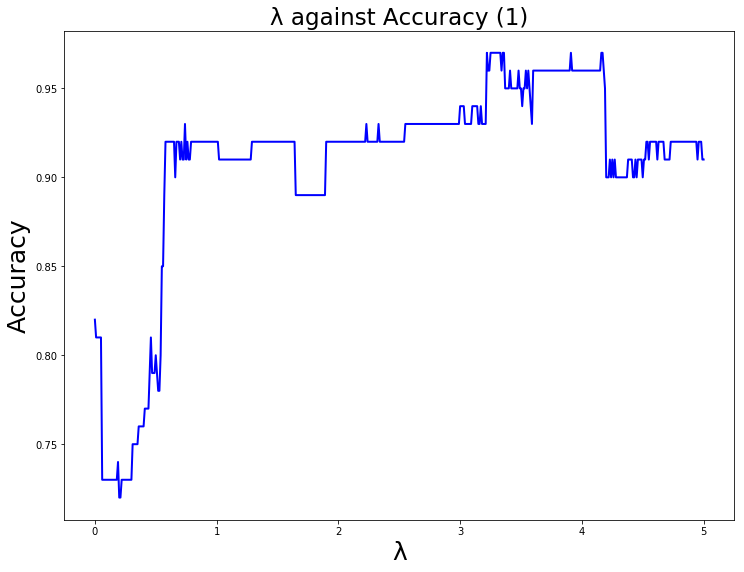

In [6]:
val = [0 for i in range(100)]
epsilon = 0.01
w = 0.1
gamma = 0.8
Length = 10
accuracy = []
lamlist = []
lam=0

## supressing show progress information
solvers.options['show_progress'] = False

# Let us get the optimal action for the expert that is using Reward 1 function
expert_action = get_expert1_action()

# Let us build action probability to fetch c D and b
action_p = []; action_p.append(tran_prob(Length,w,"left"));action_p.append(tran_prob(Length,w,"up"));action_p.append(tran_prob(Length,w,"right"));action_p.append(tran_prob(Length,w,"down"));

## Now let us sweep the lamda value; RMax = 1 and compare expert action and agent action to calculate accuracy

for i in range(501):
    c,D,b = fetch_c_D_b(expert_action, action_p, lam, 1.0)
    # Let us convert it into matrix before sending it to Linear Programming
    A = matrix(D)
    b = matrix(b)
    c = matrix(c)
    ## Let us now use solver to solve the linear equation
   
    sol=solvers.lp(c,A,b)
    return_reward= sol['x'][-100:]
    reward = np.array(return_reward)
    
    stateVal = value_iteration(val,w, gamma, reward, epsilon)
    
    ## Now let us calculate OA
    agent_action = [0 for _ in range(100)]
    for s in range(100):
            agent_action[s] = np.argmax([Bellman(s, 0, w, gamma, reward, stateVal),Bellman(s, 1, w, gamma, reward, stateVal),Bellman(s, 2, w, gamma, reward, stateVal),Bellman(s, 3, w, gamma, reward, stateVal)])
    num = 0
    for j, k in zip(expert_action, agent_action):
        if j == k:
                num += 1
    acc = num / len(agent_action)
    accuracy.append(acc)
    lamlist.append(lam)
    lam += 0.01

## Now let us plot the figure
plt.figure(figsize=(12,9))
plt.xlabel('λ', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.title('λ against Accuracy (1)', fontsize=23)
plt.plot(lamlist, accuracy, color="blue", lw=2)
plt.show()
    


In [7]:
# This is for question 12
Max_Acc = 0
Max_lambda = 0
Max_Acc = np.argmax(accuracy)
Max_lambda = lamlist[Max_Acc]
print(Max_lambda)
solvers.options['show_progress'] = False
## Let us fetch the extracted reward for the Max lambda that drove highest accuracy
c_ext,D_ext,b_ext = fetch_c_D_b(expert_action, action_p, Max_lambda, 1.0)
A_ext = matrix(D_ext)
b_ext = matrix(b_ext)
c_ext = matrix(c_ext)
    ## Let us now use solver to solve the linear equation
sol=solvers.lp(c_ext,A_ext,b_ext)
rew= sol['x'][-100:]
ext_reward = np.array(rew)
extracted_reward = np.array(ext_reward)
print(max(accuracy))

3.2199999999999753
0.97


(100, 1)


C:\Users\anupams\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


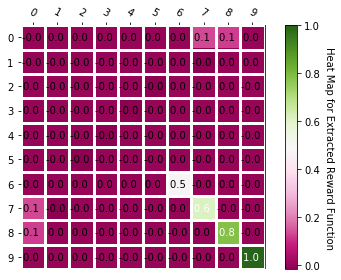

In [8]:
# Q13 : 
# Let us plot the extracted Reward into heatmap
# Let us first reshape the r

print(extracted_reward.shape)

reward_IRL1 = extracted_reward.reshape(10, 10)
fig, ax = plt.subplots()
x_label = np.arange(np.size(reward_IRL1,1))
y_label = np.arange(np.size(reward_IRL1,0))
                    
im, cbar = heatmap(reward_IRL1, x_label, y_label, ax=ax,
                   cmap="PiYG", cbarlabel="Heat Map for Extracted Reward Function")
texts = annotate_heatmap(im, valfmt="{x:.1f} ")

fig.tight_layout()
plt.show()

C:\Users\anupams\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


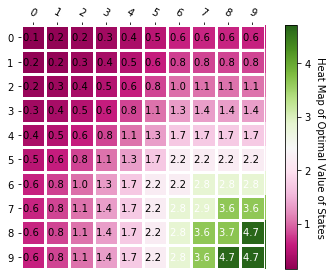

In [10]:
## Question 14

val = [0 for i in range(100)]
epsilon = 0.01
w = 0.1
Df = 0.8

rw_funcIRL=[]
rw_func_IRL = np.array(reward_IRL1).transpose()
for row in rw_func_IRL:
    rw_funcIRL += list(row)

values = value_iteration(val, w, Df, rw_funcIRL, epsilon)
g1 = np.round(values, decimals=3).reshape(10, 10).transpose()

fig, ax = plt.subplots()
x_label = np.arange(np.size(rw_func_IRL,1))
y_label = np.arange(np.size(rw_func_IRL,0))
                    
im, cbar = heatmap(g1, x_label, y_label, ax=ax,
                   cmap="PiYG", cbarlabel="Heat Map of Optimal Value of States")
texts = annotate_heatmap(im, valfmt="{x:.1f} ")

fig.tight_layout()
plt.show()


Text(0.5,1,'Optimal action for each state - Extracted Reward Function')

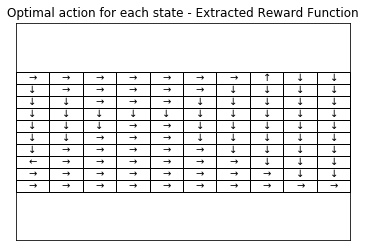

In [12]:
# Question 16
pi_st = [0 for i in range(100)]

epsilon = 0.01
w = 0.1
Df = 0.8

rw_funcIRL=[]
rw_func_IRL = np.array(reward_IRL1).transpose()
for row in rw_func_IRL:
    rw_funcIRL += list(row)
    
    
directions = ['\u2190', '\u2191', '\u2192', '\u2193']
for st in range(100):
    pi_st[st] = directions[np.argmax([Bellman(st, 0, w, Df, rw_funcIRL, values),Bellman(st, 1, w, Df, rw_funcIRL, values),Bellman(st, 2, w, Df, rw_funcIRL, values),Bellman(st, 3, w, Df, rw_funcIRL, values)])]
pi = np.array(pi_st).reshape(10, 10).transpose()
plt.table(cellText=pi, loc='center', cellLoc='center')
plt.xticks([])
plt.yticks([])
plt.title("Optimal action for each state - Extracted Reward Function")

#### Question 18 that uses reward function 2 as an expert optimal policy that can be then used in Inverse Reinforcement Learning to train the agent and then we compare the accuracy of expert with agent for different values of lambda.  

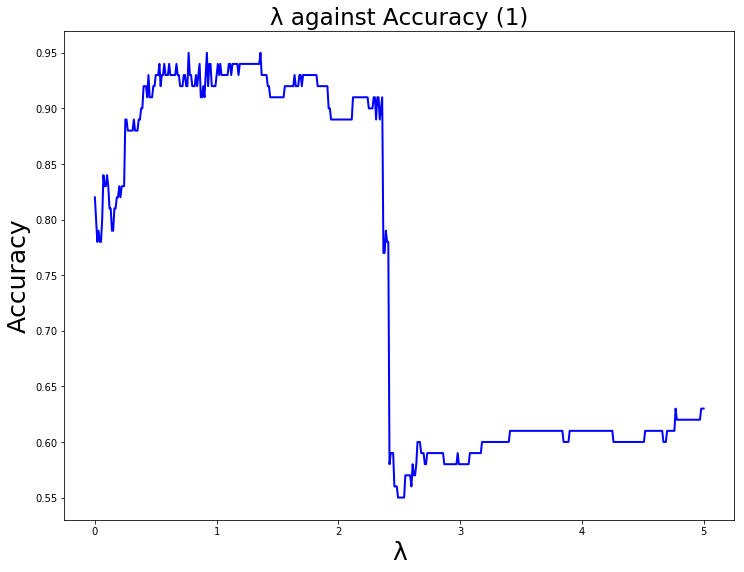

In [32]:
val = [0 for i in range(100)]
epsilon = 0.01
w = 0.1
gamma = 0.8
Length = 10
accuracy = []
lamlist = []
lam=0

## supressing show progress information
solvers.options['show_progress'] = False

# Let us get the optimal action for the expert that is using Reward 1 function
expert_action = get_expert2_action()

# Let us build action probability to fetch c D and b
action_p = []; action_p.append(tran_prob(Length,w,"left"));action_p.append(tran_prob(Length,w,"up"));action_p.append(tran_prob(Length,w,"right"));action_p.append(tran_prob(Length,w,"down"));

## Now let us sweep the lamda value; RMax = 100 (-100) and compare expert action and agent action to calculate accuracy

for i in range(501):
    c,D,b = fetch_c_D_b(expert_action, action_p, lam, 100.0)
    # Let us convert it into matrix before sending it to Linear Programming
    A = matrix(D)
    b = matrix(b)
    c = matrix(c)
    ## Let us now use solver to solve the linear equation
   
    sol=solvers.lp(c,A,b)
    return_reward= sol['x'][-100:]
    reward = np.array(return_reward)
    stateVal = value_iteration(val,w, gamma, reward, epsilon)
    
    ## Now let us calculate OA
    agent_action = [0 for _ in range(100)]
    for s in range(100):
            agent_action[s] = np.argmax([Bellman(s, 0, w, gamma, reward, stateVal),Bellman(s, 1, w, gamma, reward, stateVal),Bellman(s, 2, w, gamma, reward, stateVal),Bellman(s, 3, w, gamma, reward, stateVal)])
    num = 0
    for j, k in zip(expert_action, agent_action):
        if j == k:
                num += 1
    acc = num / len(agent_action)
    accuracy.append(acc)
    lamlist.append(lam)
    lam += 0.01

## Now let us plot the figure
plt.figure(figsize=(12,9))
plt.xlabel('λ', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.title('λ against Accuracy (1)', fontsize=23)
plt.plot(lamlist, accuracy, color="blue", lw=2)
plt.show()
    


In [33]:
# This is for question 19
Max_Acc = np.argmax(accuracy)
Max_lambda = lamlist[Max_Acc]
print(Max_lambda)
solvers.options['show_progress'] = False
## Let us fetch the extracted reward for the Max lambda that drove highest accuracy
c_ext,D_ext,b_ext = fetch_c_D_b(expert_action, action_p, Max_lambda, 100.0)
A_ext = matrix(D_ext)
b_ext = matrix(b_ext)
c_ext = matrix(c_ext)
    ## Let us now use solver to solve the linear equation
sol=solvers.lp(c_ext,A_ext,b_ext)
rew= sol['x'][-100:]
ext_reward = np.array(rew)
extracted_reward2 = np.array(ext_reward)
print(max(accuracy))

0.7700000000000005
0.95
